In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
df=pd.read_csv("weather_1970-2024.csv",skiprows=3)

In [4]:
df

,time,temperature_2m (°F),relative_humidity_2m (%),dew_point_2m (°F),apparent_temperature (°F),precipitation (mm),weather_code (wmo code),pressure_msl (hPa),surface_pressure (hPa),cloud_cover (%),wind_speed_10m (mp/h),wind_speed_100m (mp/h),wind_direction_10m (°),wind_direction_100m (°),soil_temperature_0_to_7cm (°F),soil_moisture_0_to_7cm (m³/m³)
0,1974-01-01T00:00,11.9,76,5.9,1.3,0.2,71,1026.1,1008.2,100,9.8,15.4,330,330,31.6,0.381
1,1974-01-01T01:00,11.1,77,5.2,0.4,0.1,71,1026.0,1008.1,100,10.1,16.0,328,329,31.6,0.380
2,1974-01-01T02:00,10.4,77,4.6,-0.2,0.0,3,1027.4,1009.4,100,9.8,15.8,325,327,31.6,0.380
3,1974-01-01T03:00,9.3,78,3.9,-1.3,0.0,3,1028.0,1010.0,82,9.6,16.3,323,324,31.6,0.380
4,1974-01-01T04:00,8.0,80,3.1,-2.4,0.0,1,1028.4,1010.3,50,9.1,16.3,324,327,31.6,0.380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445051,2024-10-08T19:00,69.0,32,38.3,67.2,0.0,0,1018.6,1002.8,0,2.4,2.9,8,9,69.9,0.242
445052,2024-10-08T20:00,69.6,33,39.2,67.0,0.0,0,1018.0,1002.2,0,2.5,3.0,357,358,71.0,0.241
445053,2024-10-08T21:00,69.6,33,39.5,66.0,0.0,0,1017.6,1001.8,0,2.6,3.2,358,358,71.3,0.239
445054,2024-10-08T22:00,68.9,35,40.1,65.1,0.0,0,1017.4,1001.6,0,3.1,3.9,2,2,70.4,0.239


In [5]:
df.columns = [
    'time', 'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip',
    'weather_code', 'msl_pressure', 'surface_pressure', 'cloud_cover', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m', 
    'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445056 entries, 0 to 445055
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 445056 non-null  object 
 1   temp_2m              445056 non-null  float64
 2   humidity_2m          445056 non-null  int64  
 3   dew_point_2m         445056 non-null  float64
 4   apparent_temp        445056 non-null  float64
 5   precip               445056 non-null  float64
 6   weather_code         445056 non-null  int64  
 7   msl_pressure         445056 non-null  float64
 8   surface_pressure     445056 non-null  float64
 9   cloud_cover          445056 non-null  int64  
 10  wind_speed_10m       445056 non-null  float64
 11  wind_speed_100m      445056 non-null  float64
 12  wind_dir_10m         445056 non-null  int64  
 13  wind_dir_100m        445056 non-null  int64  
 14  soil_temp_0_7cm      445056 non-null  float64
 15  soil_moisture_0_7

In [7]:
# Mapping of weather codes to descriptions
weather_mapping = {
    0: 'Clear sky',
    1: 'Mainly clear',
    2: 'Partly cloudy',
    3: 'Overcast',
    45: 'Fog',
    48: 'Depositing rime fog',
    51: 'Drizzle: Light',
    53: 'Drizzle: Moderate',
    55: 'Drizzle: Dense',
    56: 'Freezing Drizzle: Light',
    57: 'Freezing Drizzle: Dense',
    61: 'Rain: Slight',
    63: 'Rain: Moderate',
    65: 'Rain: Heavy',
    66: 'Freezing Rain: Light',
    67: 'Freezing Rain: Heavy',
    71: 'Snow fall: Slight',
    73: 'Snow fall: Moderate',
    75: 'Snow fall: Heavy',
    77: 'Snow grains',
    80: 'Rain showers: Slight',
    81: 'Rain showers: Moderate',
    82: 'Rain showers: Violent',
    85: 'Snow showers: Slight',
    86: 'Snow showers: Heavy',
    95: 'Thunderstorm: Slight',
    96: 'Thunderstorm: Moderate',
    99: 'Thunderstorm with heavy hail',
}

# Map the weather codes to their descriptions
df['weather_code'] = df['weather_code'].map(weather_mapping)

In [8]:
df.describe()


,temp_2m,humidity_2m,dew_point_2m,apparent_temp,precip,msl_pressure,surface_pressure,cloud_cover,wind_speed_10m,wind_speed_100m,wind_dir_10m,wind_dir_100m,soil_temp_0_7cm,soil_moisture_0_7cm
count,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000,445056.000000
mean,56.620039,67.553618,44.973568,54.034753,0.125924,1017.185175,1000.958873,39.596469,7.134997,12.253161,194.585192,194.940320,58.050407,0.319483
std,19.986585,18.179843,19.621469,24.823236,0.598991,7.009960,6.613368,37.357044,3.471149,5.600437,97.521988,97.476942,18.435676,0.074044
min,-25.500000,13.000000,-33.600000,-35.100000,0.000000,981.600000,966.100000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.900000,0.127000
25%,40.700000,53.000000,30.600000,33.600000,0.000000,1012.800000,997.000000,3.000000,4.600000,8.200000,129.000000,130.000000,41.800000,0.275000
50%,58.600000,68.000000,47.200000,55.000000,0.000000,1016.700000,1000.700000,29.000000,6.500000,11.900000,191.000000,194.000000,58.800000,0.342000
75%,73.000000,83.000000,61.600000,75.200000,0.000000,1021.200000,1004.800000,77.000000,9.100000,15.800000,280.000000,279.000000,73.600000,0.374000
max,106.500000,100.000000,82.100000,112.100000,45.700000,1048.900000,1030.500000,100.000000,28.300000,45.600000,360.000000,360.000000,112.500000,0.441000


## Observation

### temp_2m:

Mean: Approximately 56.62°F, indicating that the dataset predominantly captures mild temperatures.
Range: From -25.5°F to 106.5°F, suggesting the dataset covers extreme conditions, likely across different seasons and geographic locations.
Standard Deviation: About 19.99°F, indicating considerable variability in temperature readings

### dew_point_2m:

Mean: Around 44.97°F, which indicates relatively comfortable humidity levels, as dew points below 50°F typically correspond to drier air.
Range: From -33.6°F to 82.1°F, showing a wide variability in humidity conditions.

### apparent_temp:

Mean: Approximately 54.03°F, which reflects the perceived temperature taking into account humidity and wind.
Range: From -35.1°F to 112.1°F, again highlighting extremes in perceived temperatures.



### humidity_2m:

Mean: About 67.55%, indicating moderately humid conditions overall.
Range: From 13% to 100%, showing some days of extremely low humidity (possibly desert or dry conditions) and maximum saturation.
### precip:

Mean: Approximately 0.13 inches, suggesting light precipitation on average. However, the maximum value of 45.7 inches indicates some instances of heavy rain or snow events. This suggests that while the overall trend indicates minimal precipitation, there are sporadic occurrences of significant weather events.

### Atmospheric Pressure
msl_pressure and surface_pressure:
Mean: MSL pressure around 1017.19 hPa and surface pressure at 1000.96 hPa, which are typical values for many regions.
Standard Deviations: Indicates moderate variability in pressure readings, potentially affected by weather systems moving through the area.

### cloud Cover and Wind
cloud_cover:

Mean: About 39.60%, indicating a mix of clear and cloudy conditions.
Range: From 0% to 100%, showing the dataset captures days with complete overcast and clear skies.

### wind_speed_10m and wind_speed_100m:

Mean: Around 7.13 m/s at 10m and 12.25 m/s at 100m, indicating that wind speeds are higher at 100m, which is typical due to less surface friction.
Maximum Wind Speed: Up to 28.3 m/s (around 101 km/h), which suggests potential extreme weather conditions like storms.

### Soil Temperature and Moisture
soil_temp_0_7cm:
The dataset should include the soil temperature variations, which are critical for understanding local weather and predicting surface temperature.
Soil moisture statistics (mean around 0.32) suggest variability in moisture content, impacting local temperature predictions.


In [9]:
df.nunique()

time                   445056
temp_2m                  1234
humidity_2m                88
dew_point_2m             1115
apparent_temp            1405
precip                    168
weather_code               13
msl_pressure              635
surface_pressure          607
cloud_cover               101
wind_speed_10m            258
wind_speed_100m           393
wind_dir_10m              361
wind_dir_100m             360
soil_temp_0_7cm          1042
soil_moisture_0_7cm       314
dtype: int64

In [10]:
df.isnull().sum()


time                   0
temp_2m                0
humidity_2m            0
dew_point_2m           0
apparent_temp          0
precip                 0
weather_code           0
msl_pressure           0
surface_pressure       0
cloud_cover            0
wind_speed_10m         0
wind_speed_100m        0
wind_dir_10m           0
wind_dir_100m          0
soil_temp_0_7cm        0
soil_moisture_0_7cm    0
dtype: int64

In [11]:
df.duplicated().sum()

0

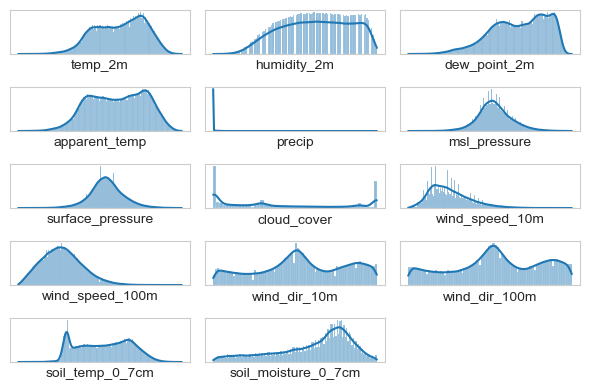

In [12]:
color = sns.color_palette("viridis")
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax1 = plt.subplots(5,3, figsize=(6,4))
k = 0
columns = [
     'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip', 'msl_pressure', 'surface_pressure', 'cloud_cover', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 'wind_dir_100m', 
    'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]
for i in range(5):
    for j in range(3):
        if k < len(columns):

            ax=sns.histplot(x=df[columns[k]],ax=ax1[i][j],kde=True)
            ax.set_ylabel(None); ax.set_yticks([])
            ax.set_xticks([])

            k += 1
            
        else:
            ax1[i][j].set_visible(False)  # Hide empty subplots

plt.tight_layout()
plt.show()


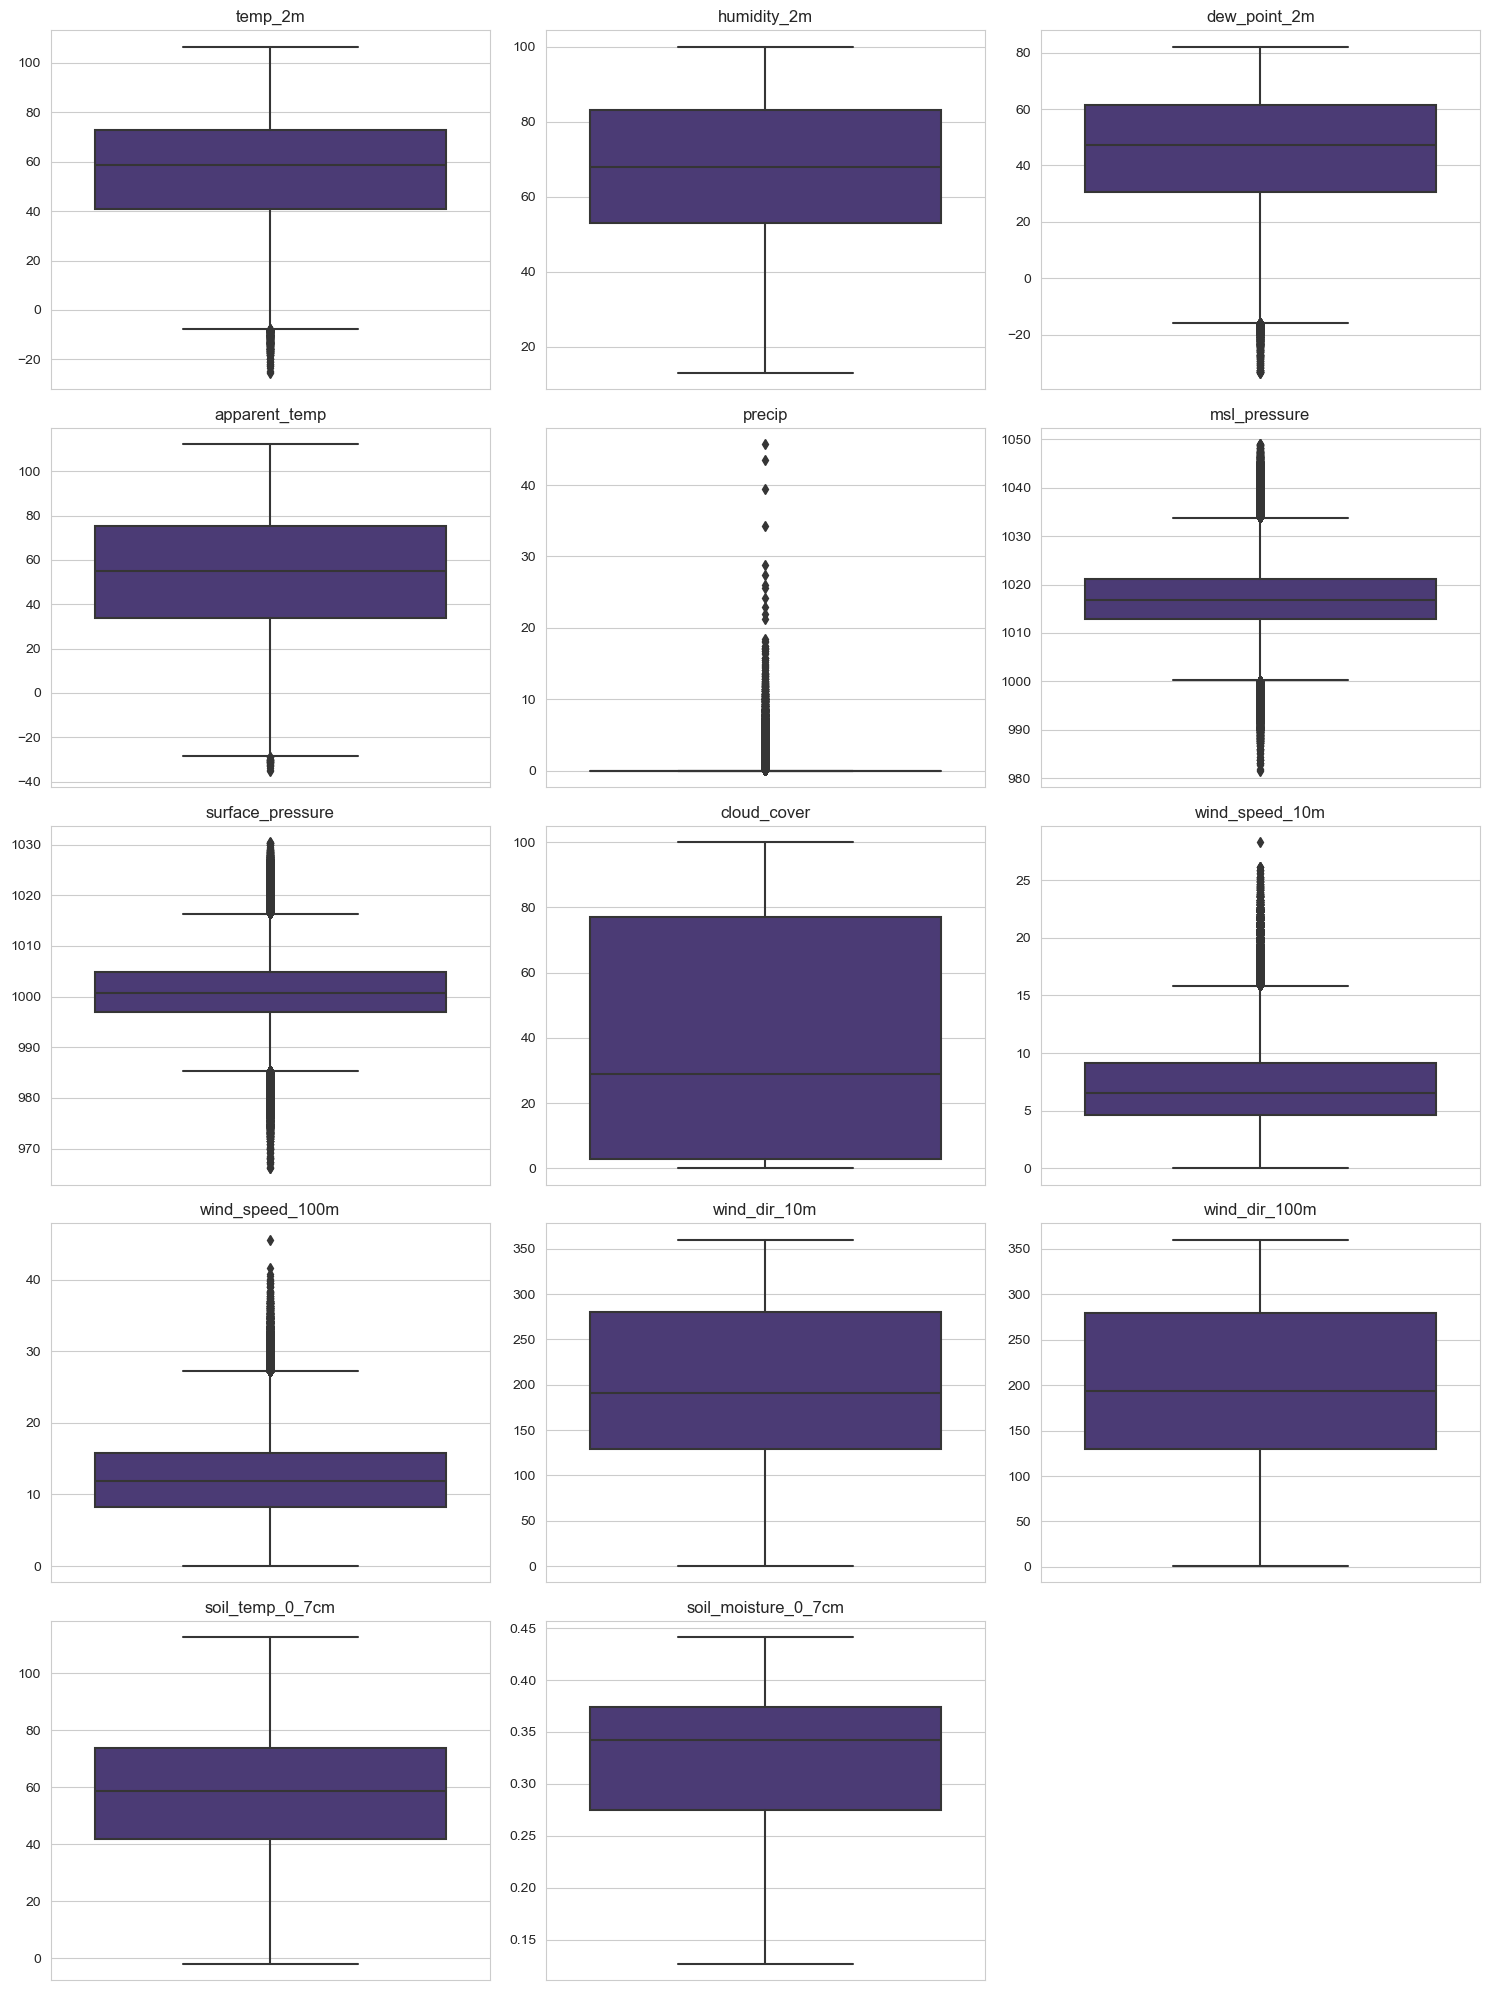

In [187]:


# List of columns to plot
columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 
    'precip', 'msl_pressure', 'surface_pressure', 'cloud_cover', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

# Set the color palette and style
color = sns.color_palette("viridis")
sns.set_style("whitegrid")

# Create a figure with subplots
fig, ax1 = plt.subplots(5, 3, figsize=(15, 20))  # Adjusted size for better visibility
k = 0

# Loop through each column and plot
for i in range(5):
    for j in range(3):
        if k < len(columns):
            sns.boxplot(y=df[columns[k]], ax=ax1[i][j], palette=color)
            ax1[i][j].set_title(columns[k])
            ax1[i][j].set_ylabel(None)  # Remove y-label if not needed
            ax1[i][j].set_xlabel(None)  # Remove x-label if not needed
            k += 1
        else:
            ax1[i][j].set_visible(False)  # Hide empty subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


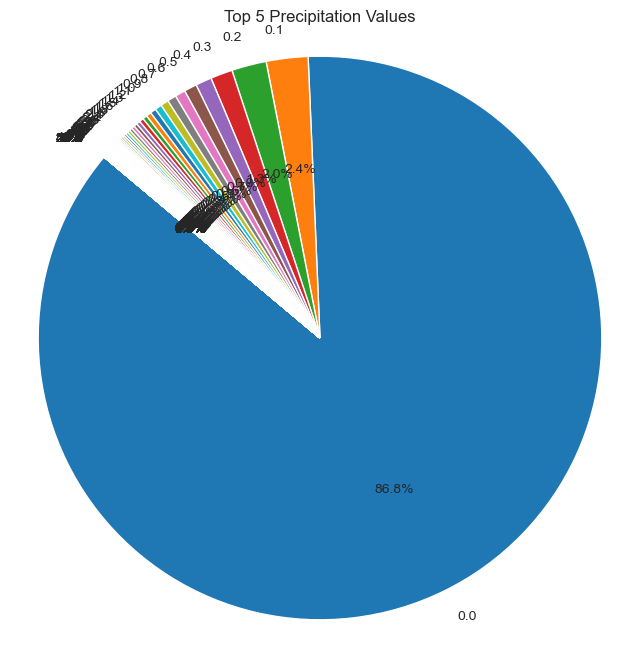

In [188]:
# Get the top 5 value counts of the 'precip' column
precip_counts = df['precip'].value_counts()[:]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(precip_counts, labels=precip_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Precipitation Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Show the plot
plt.show()

## Outlier removal

In [189]:
# Function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# List of columns to filter
columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 
     'msl_pressure', 'surface_pressure', 'cloud_cover', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

# Remove outliers for each specified column
for column in columns:
    df = remove_outliers_iqr(df, column)

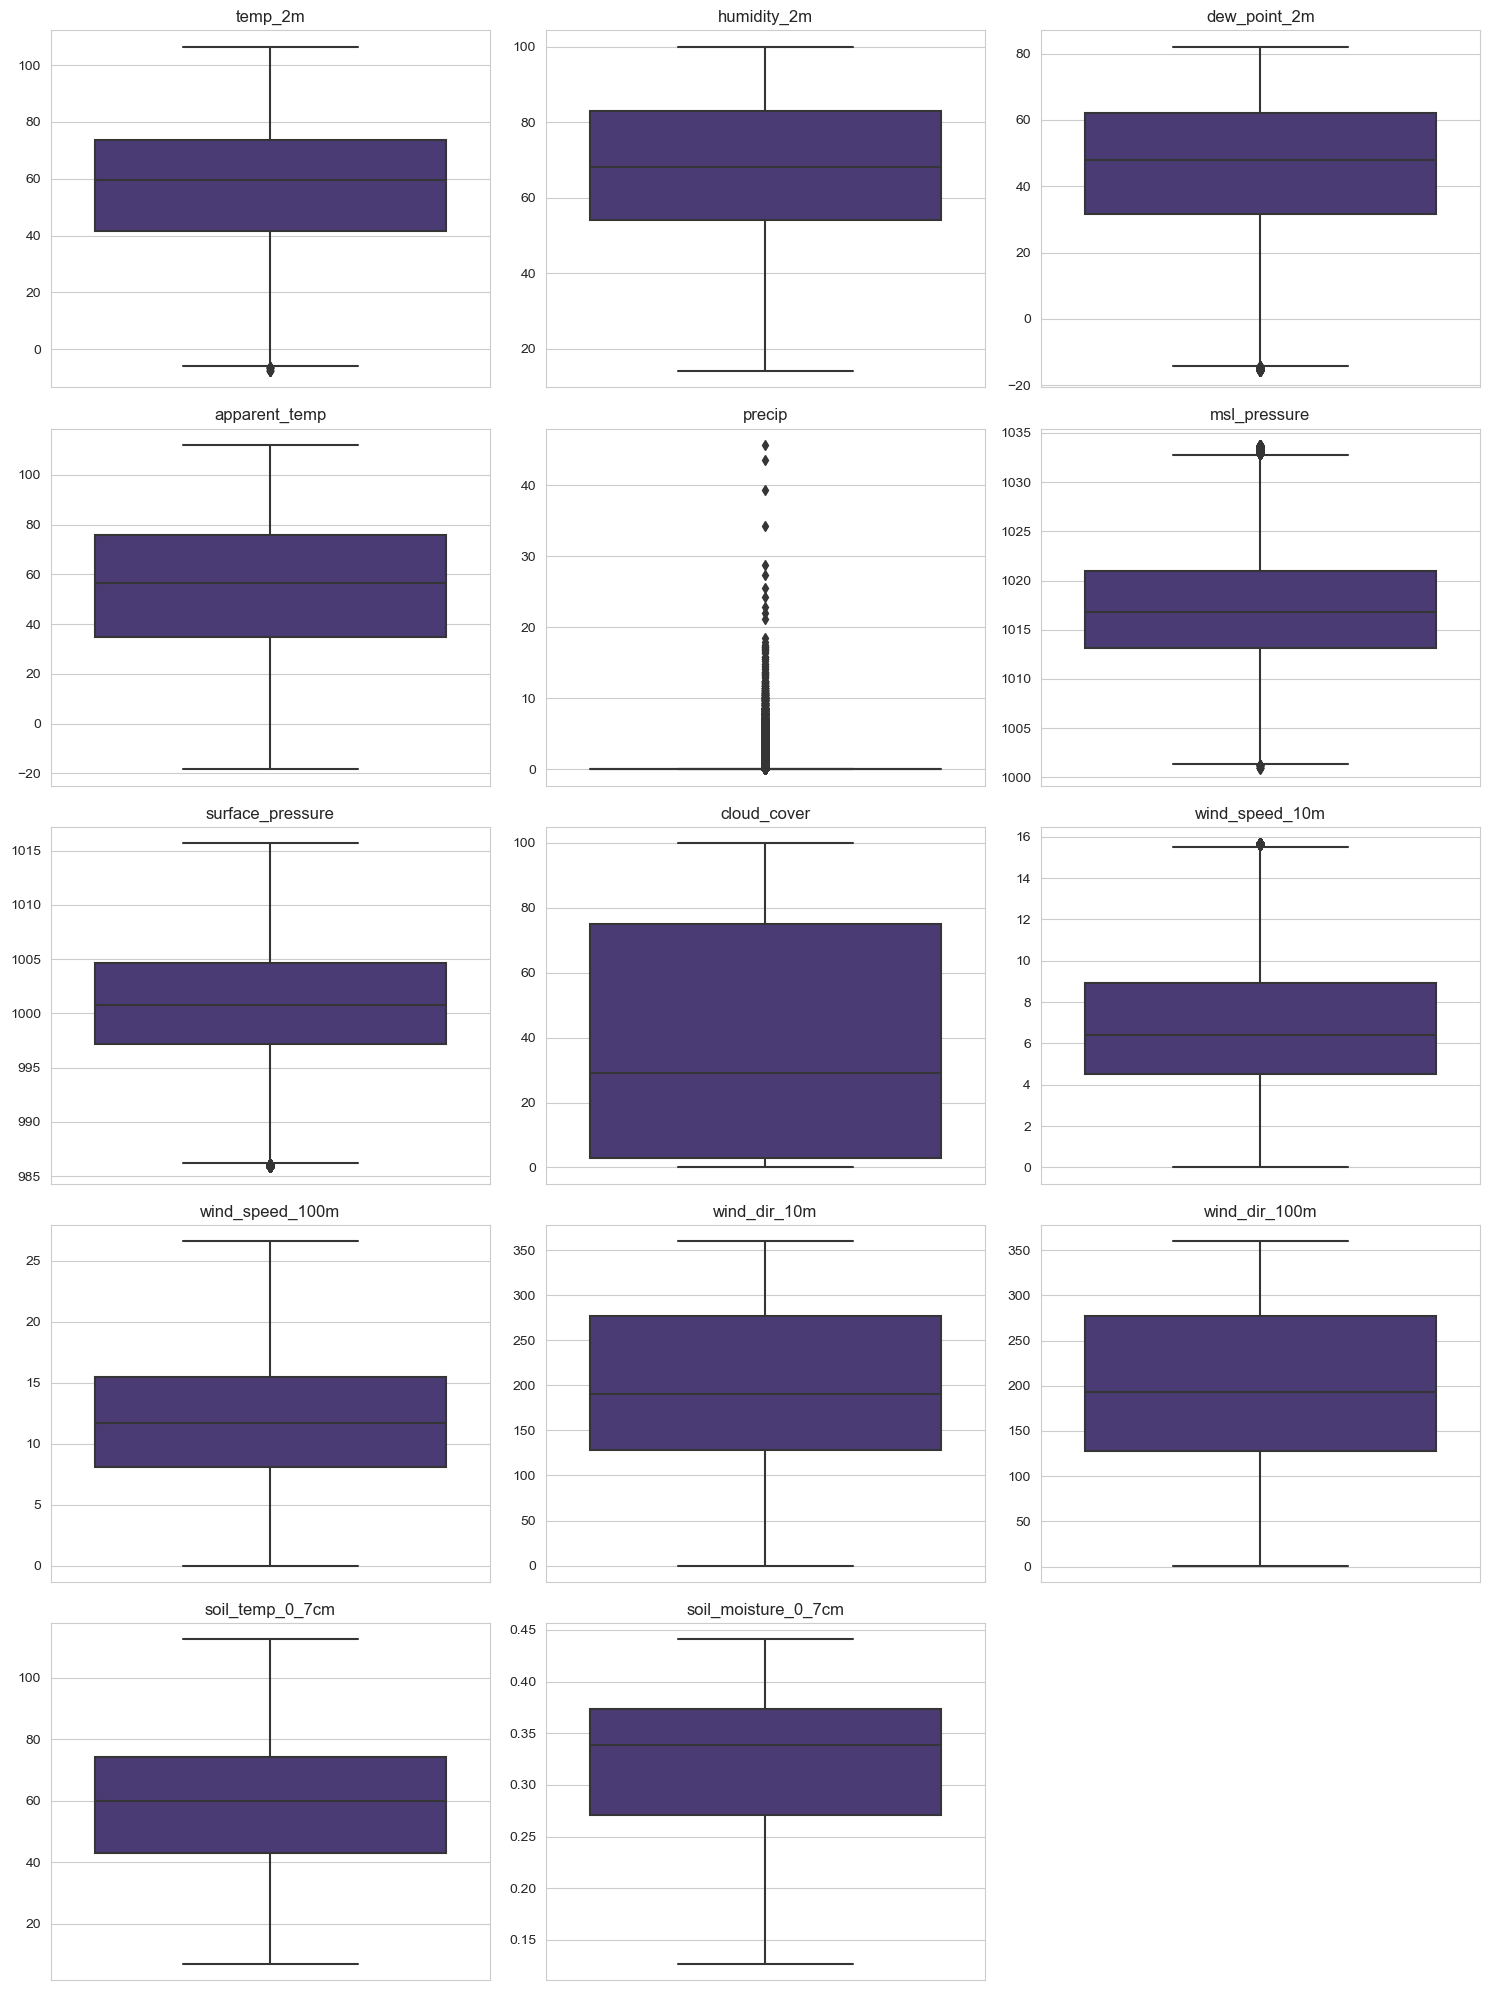

In [190]:
# List of columns to plot
columns = [
    'temp_2m', 'humidity_2m', 'dew_point_2m', 'apparent_temp', 
    'precip', 'msl_pressure', 'surface_pressure', 'cloud_cover', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

# Set the color palette and style
color = sns.color_palette("viridis")
sns.set_style("whitegrid")

# Create a figure with subplots
fig, ax1 = plt.subplots(5, 3, figsize=(15, 20))  # Adjusted size for better visibility
k = 0

# Loop through each column and plot
for i in range(5):
    for j in range(3):
        if k < len(columns):
            sns.boxplot(y=df[columns[k]], ax=ax1[i][j], palette=color)
            ax1[i][j].set_title(columns[k])
            ax1[i][j].set_ylabel(None)  # Remove y-label if not needed
            ax1[i][j].set_xlabel(None)  # Remove x-label if not needed
            k += 1
        else:
            ax1[i][j].set_visible(False)  # Hide empty subplots

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# Time series visualization

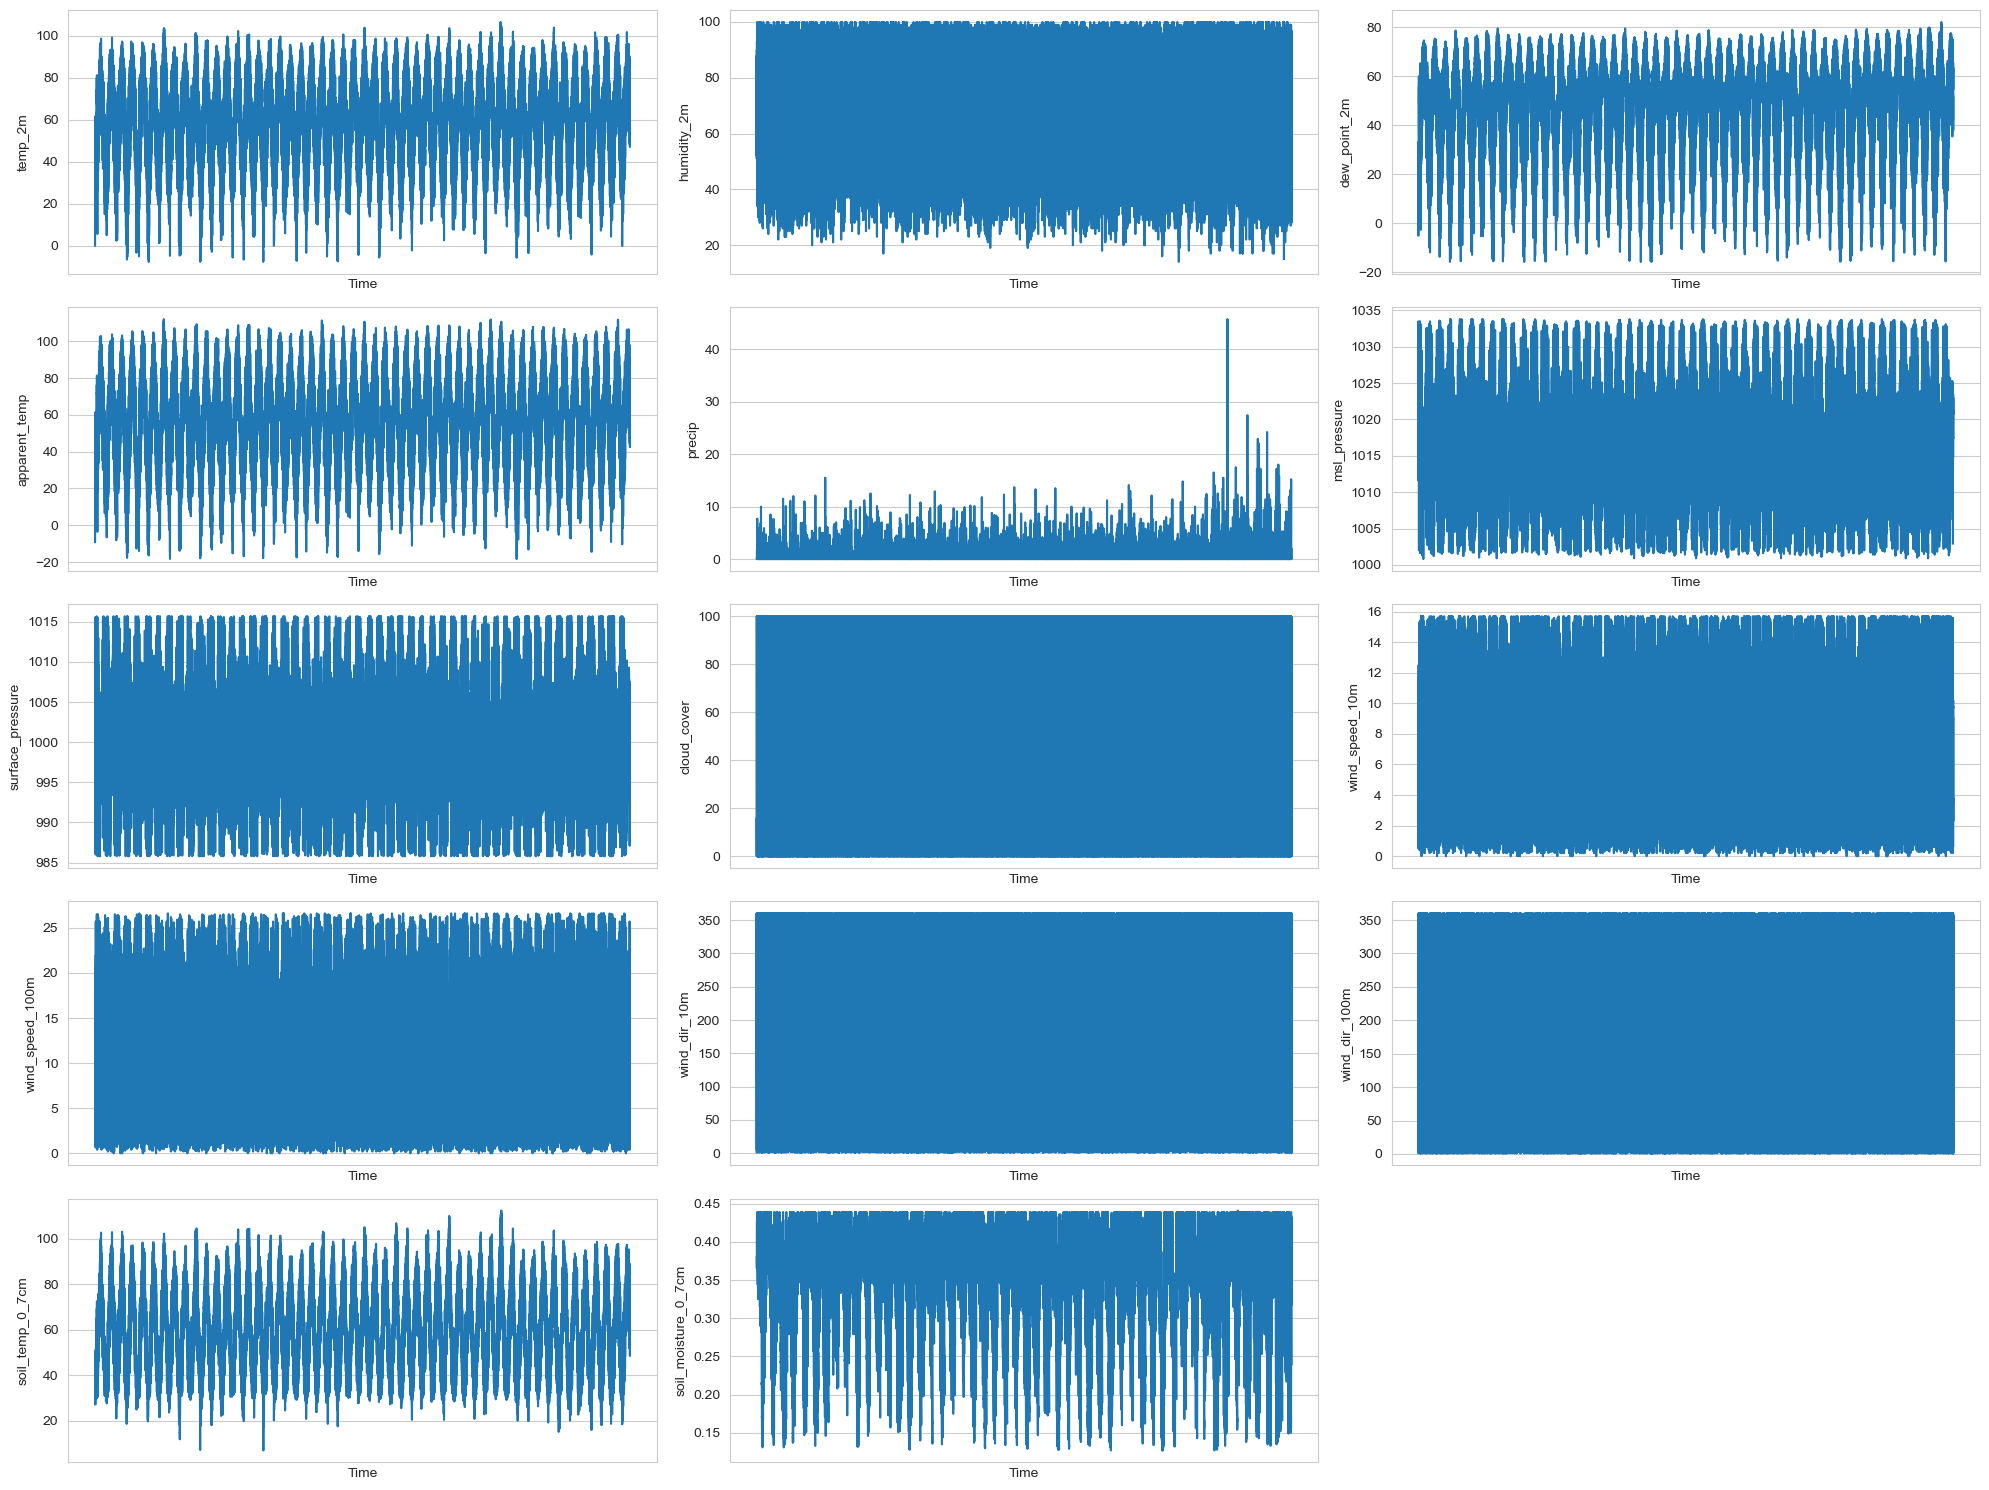

In [191]:
df['time'] = pd.to_datetime(df['time'])


# Create a figure and a grid of subplots
fig, ax1 = plt.subplots(5, 3, figsize=(20, 15))  # 4x4 grid to accommodate 16 plots
k = 0

# List of columns to plot against temperature
columns = ['temp_2m',
    'humidity_2m', 'dew_point_2m', 'apparent_temp', 'precip', 
    'msl_pressure', 'surface_pressure', 'cloud_cover', 
    'wind_speed_10m', 'wind_speed_100m', 'wind_dir_10m', 
    'wind_dir_100m', 'soil_temp_0_7cm', 'soil_moisture_0_7cm'
]

# Iterate over rows and columns for subplots
for i in range(5):
    for j in range(3):
        if k < len(columns):
            # Create scatter plot for temp_2m against the current feature
            ax =  sns.lineplot(x=df['time'], y=df[columns[k]], ax=ax1[i][j])
            #ax.set_title(f'Time vs {columns[k]}')
            ax.set_ylabel(columns[k])
            ax.set_xlabel('Time')
           
            ax.set_xticks([])  # Optionally remove x-ticks for clarity
            
            k += 1
        else:
            ax1[i][j].set_visible(False)  # Hide empty subplots

plt.tight_layout()
plt.show()

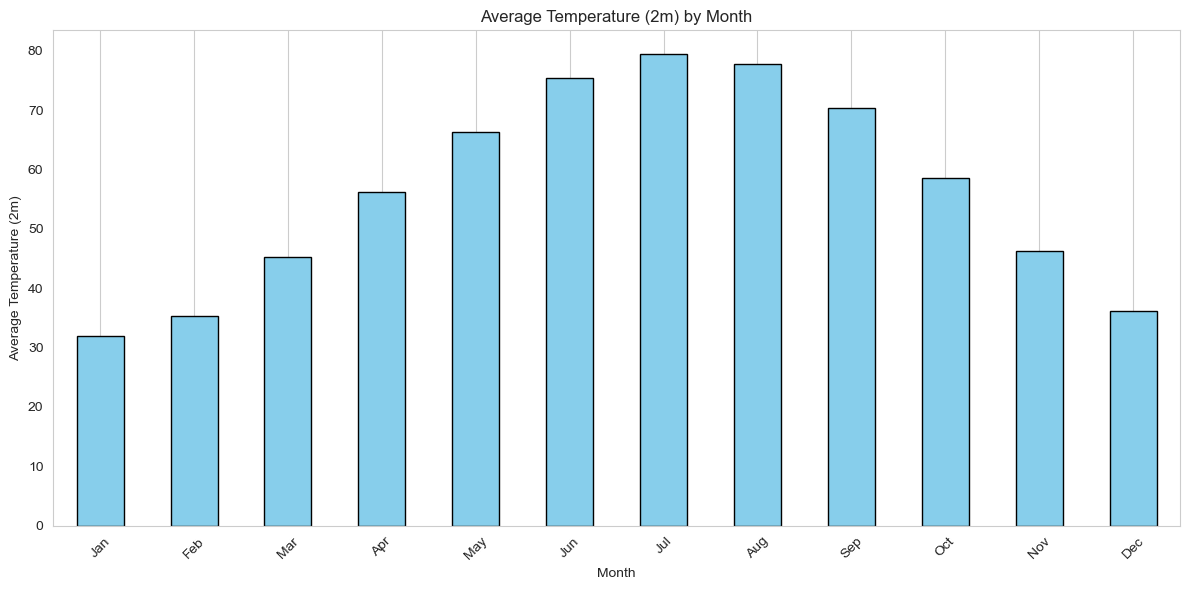

In [198]:


# Group by month and year, calculating the mean temperature
monthly_avg_temp = df.groupby(df['time'].dt.month)['temp_2m'].mean()

# Plotting
plt.figure(figsize=(12, 6))
monthly_avg_temp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Temperature (2m) by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (2m)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df['precip'].value_counts()[:2]